In [17]:
import pandas as pd 
import numpy as np 
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns

In [2]:
failures = pd.read_parquet('../data/raw/PdM_failures.parquet')

telemetry = pd.read_parquet('../data/raw/PdM_telemetry.parquet')


# Categorical target

In [7]:
# bin the voltage data into 10 bins and assign the bin to a new column

telemetry['volt_bin'] = pd.cut(telemetry['volt'], 10, labels=False)


In [11]:
# use  

# calculate the mutual information for volt_bin as target and the other columns as features

mutual_info = mutual_info_classif(telemetry.drop(['volt_bin','datetime'], axis=1), telemetry['volt_bin'])


In [13]:
# show the mutual information for each column as a dataframe
pd.DataFrame(mutual_info, index=telemetry.drop(['volt_bin','datetime'], axis=1).columns, columns=['MI']).sort_values('MI', ascending=False)

,MI
volt,1.442682
machineID,0.001315
pressure,0.000224
rotate,0.000000
vibration,0.000000


## Categorical variables 

<AxesSubplot: >

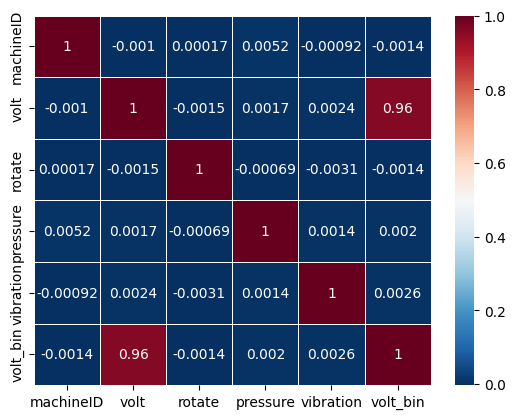

In [18]:

# calculate the correlation between the columns  except for datetime 
corr = telemetry.drop('datetime', axis=1).corr()
# plot the correlation matrix as a heatmap 
sns.heatmap(corr,
            xticklabels=corr.columns.values,    
            yticklabels=corr.columns.values,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
            